In [31]:
import pandas as pd
import seaborn as sns
import matplotlib
from scipy import stats
from scipy.stats import norm, skew

import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

In [37]:
data = pd.read_excel('data/dnn1_class_predictions.xlsx', index_col=0)
data

,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),...,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct,label,0,1,2,3,4
0,"BABYFOOD,CRL,OATMEAL,W/BANANAS,DRY",4.70,393,12.00,6.00,3.90,73.40,5.2,13.75,651,...,1 tbsp,15.0,.5 oz,0,0,0.916597,0.023928,0.052145,0.001740,0.005590
1,"HEARTS OF PALM,CANNED",90.20,28,2.52,0.62,2.04,4.62,2.4,0.00,58,...,1 cup,33.0,1 piece,0,1,0.007321,0.945028,0.045618,0.000241,0.001792
2,"CHICKEN,BROILERS OR FRYERS,THIGH,MEAT ONLY,CKD...",63.89,196,24.06,11.09,1.56,0.00,0.0,0.00,13,...,1 thigh,85.0,"1 serving, (3 oz)",29,2,0.025204,0.108391,0.665059,0.198089,0.003256
3,"PORK,CURED,SHLDR,ARM PICNIC,LN&FAT,RSTD",54.73,280,20.43,21.35,3.51,0.00,0.0,0.00,10,...,1 cup,85.0,3 oz,27,2,0.024898,0.048302,0.807863,0.117026,0.001911
4,"VINEGAR,DISTILLED",94.78,18,0.00,0.00,0.02,0.04,0.0,0.04,6,...,1 tbsp,238.0,1 cup,0,1,0.011614,0.819906,0.161033,0.001440,0.006006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7751,"DRUM,FRESHWATER,RAW",77.33,119,17.54,4.93,1.08,0.00,0.0,0.00,60,...,3 oz,198.0,1 fillet,0,2,0.024357,0.217106,0.648542,0.106174,0.003820
7752,"BEEF,LOIN,TOP LOIN,LN & FAT,1/8"" FAT,SEL,RAW",63.95,224,20.59,15.04,0.87,0.00,0.0,0.00,23,...,3 oz,0.0,0,9,2,0.023489,0.089051,0.715418,0.169559,0.002483
7753,"POTATOES,AU GRATIN,HOME-PREPARED FROM RECIPE U...",74.00,132,5.06,7.59,2.09,11.27,1.8,0.00,119,...,1 cup,0.0,0,0,1,0.012333,0.686941,0.298837,0.001087,0.000802
7754,"APPLES,DEHYD (LO MOIST),SULFURED,STWD",79.36,74,0.28,0.12,0.33,19.91,2.6,0.00,4,...,1 cup,0.0,0,0,1,0.005325,0.966668,0.027496,0.000055,0.000456


In [38]:
vars_ = ['Protein_(g)', 'Lipid_Tot_(g)', 'Carbohydrt_(g)', 'label', 'Energ_Kcal',0, 1,2,3,4]
df = data[vars_]
df


,Protein_(g),Lipid_Tot_(g),Carbohydrt_(g),label,Energ_Kcal,0,1,2,3,4
0,12.00,6.00,73.40,0,393,0.916597,0.023928,0.052145,0.001740,0.005590
1,2.52,0.62,4.62,1,28,0.007321,0.945028,0.045618,0.000241,0.001792
2,24.06,11.09,0.00,2,196,0.025204,0.108391,0.665059,0.198089,0.003256
3,20.43,21.35,0.00,2,280,0.024898,0.048302,0.807863,0.117026,0.001911
4,0.00,0.00,0.04,1,18,0.011614,0.819906,0.161033,0.001440,0.006006
...,...,...,...,...,...,...,...,...,...,...
7751,17.54,4.93,0.00,2,119,0.024357,0.217106,0.648542,0.106174,0.003820
7752,20.59,15.04,0.00,2,224,0.023489,0.089051,0.715418,0.169559,0.002483
7753,5.06,7.59,11.27,1,132,0.012333,0.686941,0.298837,0.001087,0.000802
7754,0.28,0.12,19.91,1,74,0.005325,0.966668,0.027496,0.000055,0.000456


In [39]:
vars_ = ['Protein_(g)', 'Lipid_Tot_(g)', 'Carbohydrt_(g)', 'label', 'Energ_Kcal']
df = data[vars_]

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import max_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV



to_drop = []

for i in range(5):
    data_x = df[df['label'] == i][['Protein_(g)', 'Lipid_Tot_(g)', 'Carbohydrt_(g)', 'Energ_Kcal', 'label']]
    
    x_train, x_test, y_train, y_test = train_test_split(data_x.drop(columns=['Energ_Kcal', 'label']), data_x['Energ_Kcal'], test_size=0.15, random_state=0)
    model = Lasso(random_state=0, max_iter= 1000)
    param_grid = {
        'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 0.8, 1, 5, 10, 20,50,100],
    }
    grid_cv_lasso = GridSearchCV(model, param_grid, cv = 5, scoring='neg_mean_absolute_error')

    grid_cv_lasso.fit(x_train, y_train)

    y_pred = grid_cv_lasso.best_estimator_.predict(x_test)
    print('class:', i)
    print(data_x)
    print('mae:', mae(y_test, y_pred))
    print('max abs err:', max_error(y_test, y_pred))
    print('***************************')
    predictions = []
    for j, row in enumerate(y_test):
        if abs(row - y_pred[j] > 12):
            to_drop.append(y_test.index[j])
        predictions.append({
            'elem': data.loc[y_test.index[j]],
            'test': row,
            'pred': y_pred[j],
            #'mae': abs(y_test[i] - y_pred[i])
                           })
    top_err = sorted(predictions, key = lambda o: abs(o['test'] - o['pred']))
    top_err.reverse()

    for elem in (top_err[:20]):
        print('name:', elem['elem']['Shrt_Desc'])
        print('test:', elem['test'])
        print('pred:', elem['pred'])
        print('prob:', elem['elem'][i])
        print('_______________')
# to_drop

class: 0
      Protein_(g)  Lipid_Tot_(g)  Carbohydrt_(g)  Energ_Kcal  label
0           12.00           6.00           73.40         393      0
7            7.10           6.00           52.60         299      0
9           11.24           2.01           81.01         348      0
10          10.50          11.70           73.20         440      0
11           5.40          22.60           66.80         481      0
...           ...            ...             ...         ...    ...
7716         7.00          22.40           44.60         403      0
7717        10.40           4.30           71.00         371      0
7738         6.09           8.69           72.12         263      0
7740         1.42           7.17           72.18         359      0
7741         3.90           9.50           81.00         423      0

[1966 rows x 5 columns]
mae: 15.287275291282128
max abs err: 390.426604981255
***************************
name: SWEETENER,HERBAL EXTRACT PDR FROM STEVIA LEAF
test: 0
pred: 39

ValueError: With n_samples=0, test_size=0.15 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
print(data.shape)


C:\Users\taras\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\taras\Anaconda3\lib\site-packages\pandas\core\frame.py:3513: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\taras\Anaconda3\lib\site-packages\pandas\core\frame.py:3484: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_gui

5.60045532646048


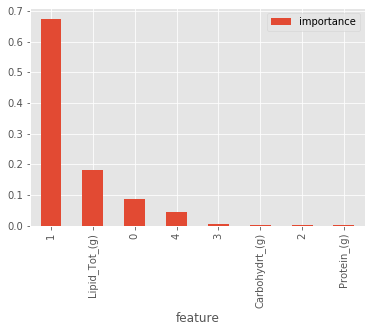

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import max_error

def pred():
    label = 'Energ_Kcal'
    y = data[label]
    x = data[['Protein_(g)', 'Lipid_Tot_(g)', 'Carbohydrt_(g)',0,1,2,3,4]]
    
#     x['label'] = x.label.astype('category')
#     x = pd.get_dummies(x)
#     print(x)
    scaler = StandardScaler()
    x[['Protein_(g)', 'Lipid_Tot_(g)', 'Carbohydrt_(g)']] = scaler.fit_transform(x[['Protein_(g)', 'Lipid_Tot_(g)', 'Carbohydrt_(g)']])
#     print(x)

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)

    rf = RandomForestRegressor(n_estimators=200, max_depth = 150, criterion='mse')

    # Обучили лес 
    rf.fit(x_train, y_train)

    # Сделали по лесу прогнозы 
    y_pred_forest = rf.predict(x_test)
    print(mae(y_test, y_pred_forest))
    
    featureImportance = pd.DataFrame({"feature": x.columns,  "importance": rf.feature_importances_})
    featureImportance.set_index('feature', inplace=True)
    featureImportance.sort_values(["importance"], ascending=False, inplace=True)
    featureImportance.plot.bar()
pred()

In [69]:
# (data.drop(to_drop)).to_excel('data/clean_predictions.xlsx')